## Plotting the figures from the article

### Imports 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

### Helper functions

In [2]:
def calcPowerSpectrum(meg,dt,sim_time):
    ''' Function that calculates a power spectrum from a time series
        
        Parameters:
            meg      : the simulated time series
            dt       : the time step
            sim_time : the simulation duration (in ms)
        Return:
            pxx      : the power spectrum
            freqs    : the frequency vector
    '''
    # fourier sample rate
    fs = 1. / dt

    tn = np.linspace(0,sim_time,int(sim_time/dt)+1)

    npts = len(meg)


    pxx,freqs=mlab.psd(meg,NFFT=npts,Fs=fs,noverlap=0,window=mlab.window_none)
    pxx[0] = 0.0

    return pxx,freqs


In [3]:
def getSingleSpikeTimes(neuron,dt):
    '''Function that calculates spike times from the trace of a single neuron
    
        Parameters:
            neuron      : the trace of a single neuron
            dt          : the time step
        Return:
            spike_times : a list of spike times
    '''
    spike_times = []
    old = 0.0
    for i,n in enumerate(neuron):
        # if theta passes (2l-1)*pi, l integer, with dtheta/dt>0 then the neuron spikes (see Boergers and Kopell, 2003)
        if (n%(2*np.pi))>np.pi and (old%(2*np.pi))<np.pi:
            spike_time = i*dt # calculate spike time in ms
            spike_times.append(spike_time) # add spike time to list
        old = n

    return spike_times

In [4]:
def getSpikeTimes(data,dt):
    '''Function that calculates spike times from the traces of a population of neurons
    
        Parameters:
            data      : the array of traces of the population
            dt          : the time step
        Return:
            spike_times : a list of lists of spike times
    '''
    nx,ny = data.shape
    spike_times = [None]*nx
    for i in range(nx):
        spike_times[i] = getSingleSpikeTimes(data[i,:],dt)
    return spike_times

### Load data (averaged over all trials)

In [5]:
ctrl_avg_meg_20_A_0 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.0.npy')
schiz_avg_meg_40_A_0 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.0.npy')

ctrl_avg_meg_20_A_0_25 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.25.npy')
schiz_avg_meg_40_A_0_25 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.25.npy')

ctrl_avg_meg_20_A_0_375 = np.load('../data/Data-Average/sims_ctrl_avg_20Hz_A0.375.npy')
schiz_avg_meg_40_A_0_375 = np.load('../data/Data-Average/sims_schiz_avg_40Hz_A0.375.npy')

### Additional parameters

In [6]:
sim_time = 500
s = 2**13
dt = float(sim_time)/float(s)
time = np.linspace(0,sim_time,int(sim_time/dt))

#### Flags

In [7]:
savefig = 0 # set savefig to 1 if you want to store the figures
showfig = 1 # set plotfi to 1 if you want to show the figures

### Produce Figure 7

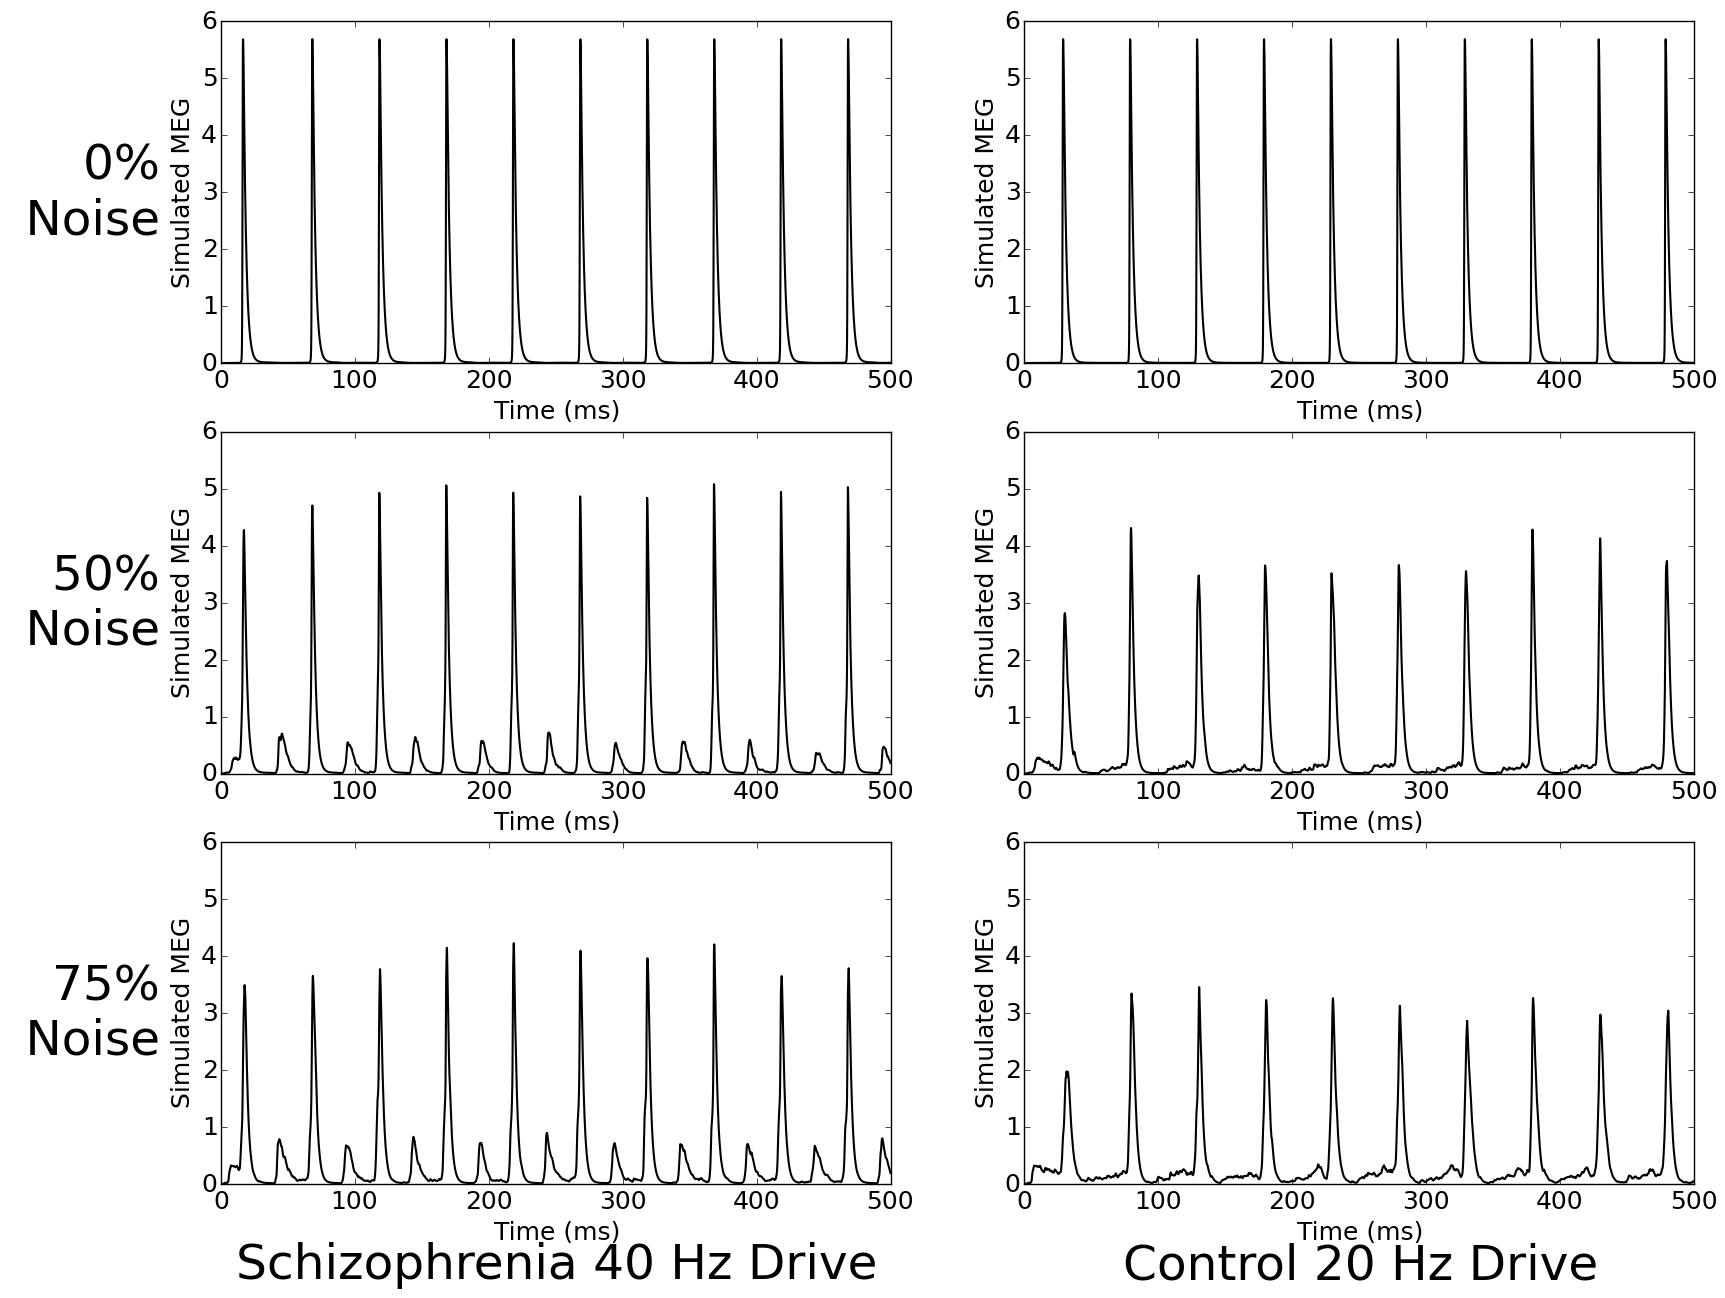

In [8]:
f,((ax1,ax2),(ax3,ax4),(ax5,ax6)) = plt.subplots(3,2,sharex=True,sharey=True,figsize=[19.0,15.0])

ax1.plot(time,schiz_avg_meg_40_A_0,'k',linewidth=1.5)
ax1.set_xlabel('Time (ms)',fontsize=18)
ax1.set_ylabel('Simulated MEG',fontsize=18)
ax1.annotate('0% \n Noise ',xy=(0,0.5),xytext=(-ax1.yaxis.labelpad-5,0),xycoords=ax1.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax2.plot(time,ctrl_avg_meg_20_A_0,'k',linewidth=1.5)
ax2.set_xlabel('Time (ms)',fontsize=18)
ax2.set_ylabel('Simulated MEG',fontsize=18)
ax3.plot(time,schiz_avg_meg_40_A_0_25,'k',linewidth=1.5)
ax3.set_xlabel('Time (ms)',fontsize=18)
ax3.set_ylabel('Simulated MEG',fontsize=18)
ax3.annotate('50% \n Noise',xy=(0,0.5),xytext=(-ax3.yaxis.labelpad-5,0),xycoords=ax3.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax4.plot(time,ctrl_avg_meg_20_A_0_25,'k',linewidth=1.5)
ax4.set_xlabel('Time (ms)',fontsize=18)
ax4.set_ylabel('Simulated MEG',fontsize=18)
ax5.plot(time,schiz_avg_meg_40_A_0_375,'k',linewidth=1.5)
ax5.set_xlabel('Time (ms)',fontsize=18)
ax5.set_ylabel('Simulated MEG',fontsize=18)
ax5.annotate('75% \n Noise',xy=(0,0.5),xytext=(-ax5.yaxis.labelpad-5,0),xycoords=ax5.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax5.annotate('Schizophrenia 40 Hz Drive',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
ax6.plot(time,ctrl_avg_meg_20_A_0_375,'k',linewidth=1.5)
ax6.set_xlabel('Time (ms)',fontsize=18)
ax6.set_ylabel('Simulated MEG',fontsize=18)
ax6.annotate('Control 20 Hz Drive',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')

plt.setp(ax1.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax2.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax3.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax4.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax5.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax6.get_xticklabels(),visible=True,fontsize=18)

plt.setp(ax2.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax4.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax6.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax1.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax3.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax5.get_yticklabels(),visible=True,fontsize=18)

if savefig:
    plt.savefig('../data/Figures/Noise-Exploration-MEG.png',dpi=600)
    plt.savefig('../data/Figures/Noise-Exploration-MEG.eps',dpi=600)


### Produce Figure 8

#### Calculate power spectra

In [10]:
pxx_ctrl_20_A_0,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0,dt,sim_time)
pxx_schiz_40_A_0,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0,dt,sim_time)

pxx_ctrl_20_A_0_25,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0_25,dt,sim_time)
pxx_schiz_40_A_0_25,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0_25,dt,sim_time)

pxx_ctrl_20_A_0_375,freqs = calcPowerSpectrum(ctrl_avg_meg_20_A_0_375,dt,sim_time)
pxx_schiz_40_A_0_375,_     = calcPowerSpectrum(schiz_avg_meg_40_A_0_375,dt,sim_time)

#### Plot figure

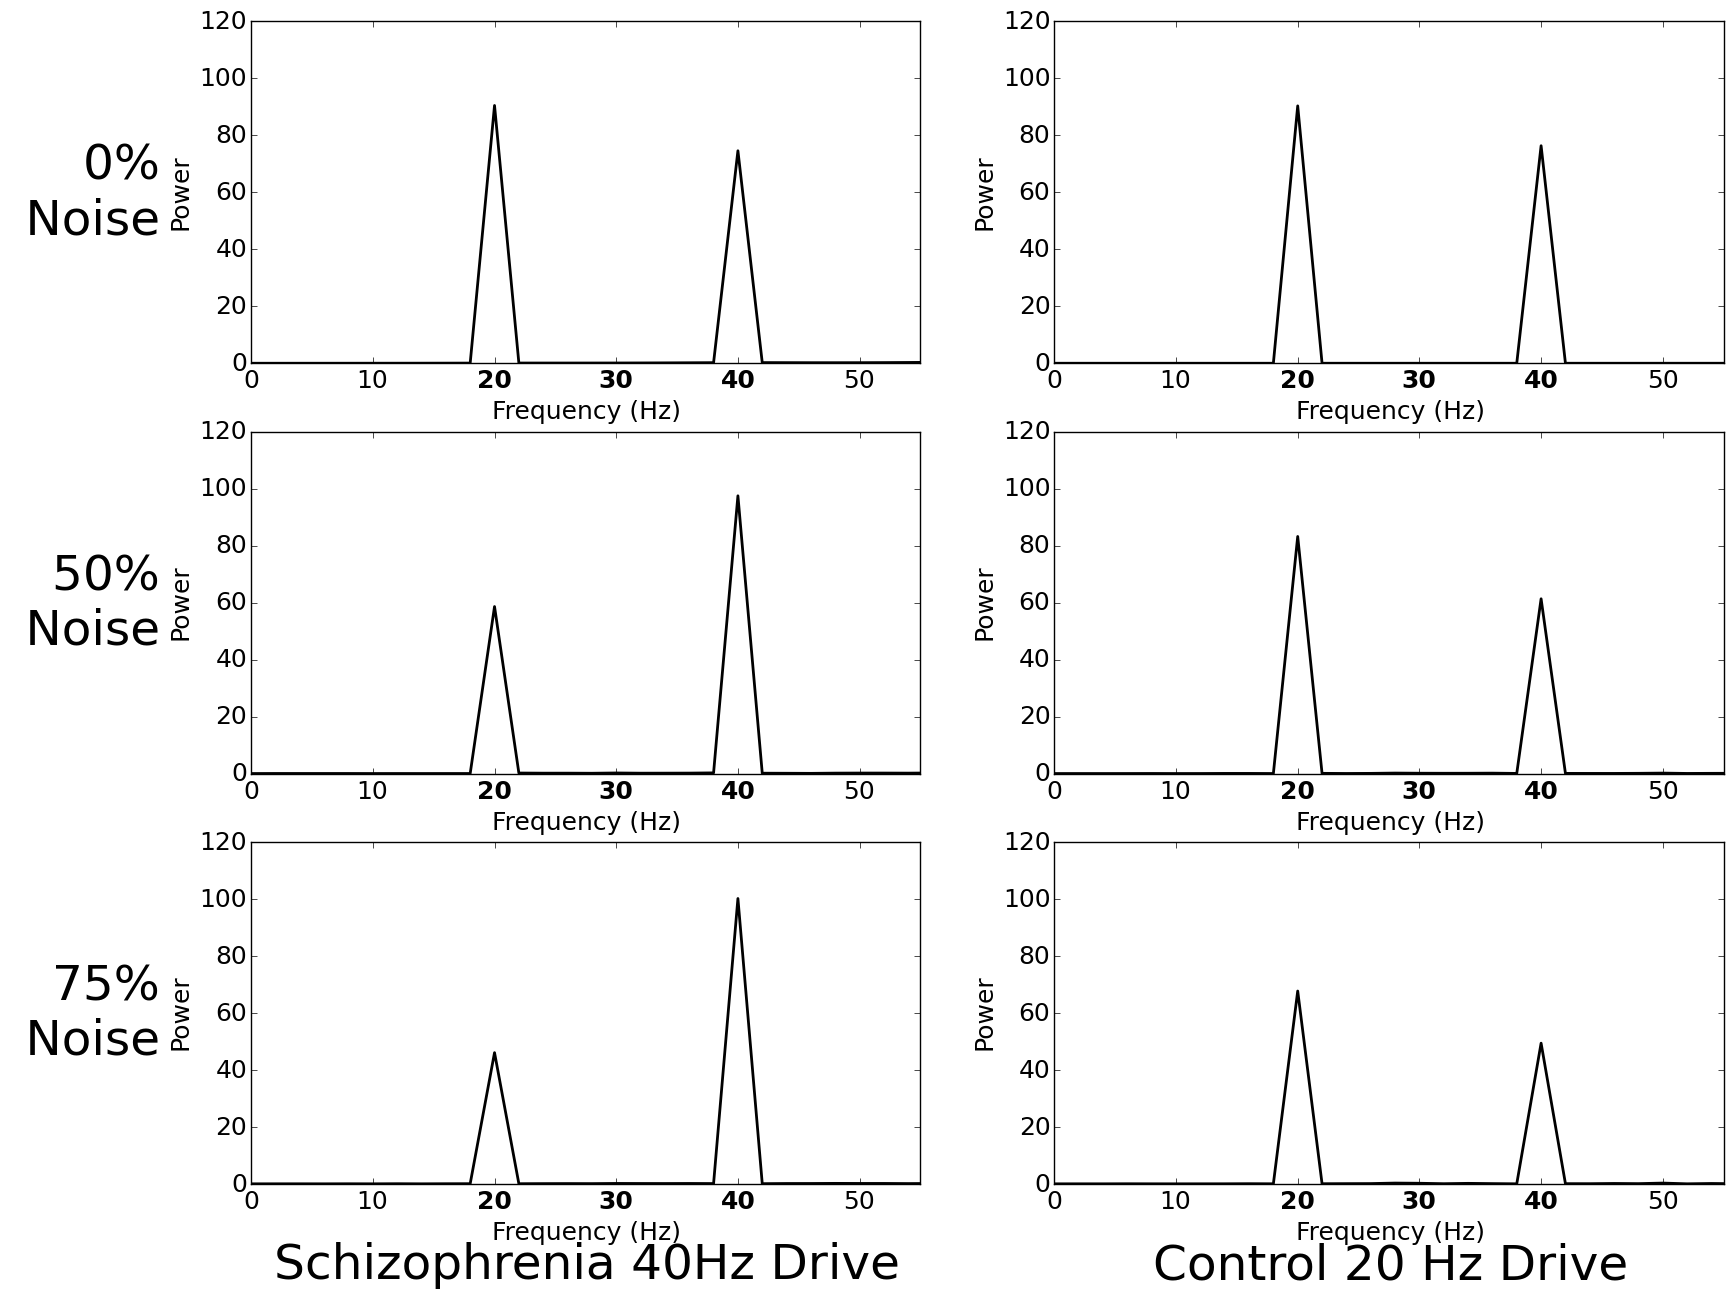

In [12]:
f2,((ax11,ax22),(ax33,ax44),(ax55,ax66)) = plt.subplots(3,2,sharex=True,sharey=True,figsize=[19.0,15.0])

ax11.plot(freqs*1000,pxx_schiz_40_A_0,'k',linewidth=2)
ax11.axis(xmin=0, xmax=55)
ax11.set_xlabel('Frequency (Hz)',fontsize=18)
ax11.set_ylabel('Power',fontsize=18)
ax11.annotate('0% \n Noise ',xy=(0,0.5),xytext=(-ax11.yaxis.labelpad-5,0),xycoords=ax11.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
xticks=ax11.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax22.plot(freqs*1000,pxx_ctrl_20_A_0,'k',linewidth=2)
ax22.set_xlabel('Frequency (Hz)',fontsize=18)
ax22.set_ylabel('Power',fontsize=18)
xticks=ax22.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax33.plot(freqs*1000,pxx_schiz_40_A_0_25,'k',linewidth=2)
ax33.set_xlabel('Frequency (Hz)',fontsize=18)
ax33.set_ylabel('Power',fontsize=18)
ax33.annotate('50% \n Noise ',xy=(0,0.5),xytext=(-ax33.yaxis.labelpad-5,0),xycoords=ax33.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
xticks=ax33.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax44.plot(freqs*1000,pxx_ctrl_20_A_0_25,'k',linewidth=2)
ax44.set_xlabel('Frequency (Hz)',fontsize=18)
ax44.set_ylabel('Power',fontsize=18)
xticks=ax44.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax55.plot(freqs*1000,pxx_schiz_40_A_0_375,'k',linewidth=2)
ax55.set_xlabel('Frequency (Hz)',fontsize=18)
ax55.set_ylabel('Power',fontsize=18)
ax55.annotate('75% \n Noise ',xy=(0,0.5),xytext=(-ax55.yaxis.labelpad-5,0),xycoords=ax55.yaxis.label,textcoords='offset points',size=35,ha='right',va='center')
ax55.annotate('Schizophrenia 40Hz Drive',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
xticks=ax55.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')

ax66.plot(freqs*1000,pxx_ctrl_20_A_0_375,'k',linewidth=2)
ax66.set_xlabel('Frequency (Hz)',fontsize=18)
ax66.set_ylabel('Power',fontsize=18)
ax66.annotate('Control 20 Hz Drive',xy=(0.5,0),xytext=(0,-75),xycoords='axes fraction',textcoords='offset points',size=35,ha='center',va='bottom')
xticks=ax66.xaxis.get_ticklabels()
xticks[2].set_weight('bold')
xticks[3].set_weight('bold')
xticks[4].set_weight('bold')


plt.setp(ax11.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax22.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax33.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax44.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax55.get_xticklabels(),visible=True,fontsize=18)
plt.setp(ax66.get_xticklabels(),visible=True,fontsize=18)

plt.setp(ax22.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax44.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax66.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax11.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax33.get_yticklabels(),visible=True,fontsize=18)
plt.setp(ax55.get_yticklabels(),visible=True,fontsize=18)

if savefig:
    plt.savefig('../data/Figures/Noise-Exploration-PSD.png',dpi=600)
    plt.savefig('../data/Figures/Noise-Exploration-PSD.eps',dpi=600)